In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [16]:
def cargar_datos():
    # Cargar los datos de Excel a un dataframe de Pandas
    datos = pd.read_excel("datos_cpes.xlsx")

    # Retornar el dataframe para usarlo en otras funciones
    return datos

In [17]:
def procesar_datos(datos):
    # Definir una lista de condiciones y valores para la columna VALORACION
    condiciones_1 = [(datos["VALORACION"] == "MALA"), (datos["VALORACION"] == "BUENA")]
    valores_1 = ["PÉSIMA", "REGULAR"]
    
    # Definir una lista de condiciones y valores para la columna BANDA
    condiciones_2 = [(datos["BANDA"] == "BAND_5G"), (datos["BANDA"] == "BAND_2.4G")]
    valores_2 = ["5GHZ", "2.4GHZ"]

    # Cambiar los datos en las columnas VALORACION y BANDA en base a las condiciones y valores establecidos
    datos["VALORACION"] = np.where(condiciones_1[0], valores_1[0],
                                   np.where(condiciones_1[1], valores_1[1], datos["VALORACION"]))
    datos["BANDA"] = np.where(condiciones_2[0], valores_2[0], 
                              np.where(condiciones_2[1], valores_2[1], datos["BANDA"]))

    # Retornar el dataframe para usarlo en otras funciones
    return datos

In [18]:
def visualizacion(datos):
    # Crear 2 subgráficas en una misma ventana (1 fila, 2 columnas)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Definir gráfica de frecuencias mediante histograma para el tipo de vehículo 
    sns.histplot(datos["BANDA"], ax=axs[0], color="skyblue")
    axs[0].set_title("Uso de Bandas", fontweight="bold")

    # Definir gráfica de frecuencias mediante histograma para los tiempos de entrega
    sns.histplot(datos["VALORACION"], ax=axs[1], color="lightgreen")
    axs[1].set_title("Valoración en calidad de señal", fontweight="bold")

    # Ajustar y mostrar las gráficas
    plt.tight_layout()
    plt.show()

In [19]:
def modelo_arbol_decision(datos):
    # Eliminar columnas innecesarias
    eliminar_columnas = ["NOMBRE_DISPOSITIVO"]
    datos = datos.drop(eliminar_columnas, axis=1)
    
    # Convertir variables categóricas a variables dummy también conocido como Codificación One-Hot
    datos = pd.get_dummies(datos, columns=["BANDA"])

    # Dividir el dataframe en variables independiente-predictora (X) y dependiente-predicha (y)
    X = datos.drop(["VALORACION"], axis=1)
    y = datos["VALORACION"]

    # Dividir el dataframe en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de árbol de decisión para clasificación
    classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
    classifier.fit(X_train, y_train)

    # Verificar características importantes // se puede notar que solamente 3 características aportan a la predicción, el resto de variables se podrían eliminar
    feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)
    print(feature_importances_df)

    # Visualizar el árbol de decisión
    plt.figure(figsize=(12, 8))
    plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(classifier.classes_))
    plt.title("Árbol de decisión para *VALORACION*", fontweight="bold", fontsize=16)
    plt.show()

In [20]:
def modelo_arbol_decision_datos_balanceados(datos):
    # Eliminar columnas innecesarias
    eliminar_columnas = ["NOMBRE_DISPOSITIVO"]
    datos = datos.drop(eliminar_columnas, axis=1)
    
    # Convertir variables categóricas a variables dummy también conocido como Codificación One-Hot
    datos = pd.get_dummies(datos, columns=["BANDA"])

    # Dividir el dataframe en variables independiente-predictora (X) y dependiente-predicha (y)
    X = datos.drop(["VALORACION"], axis=1)
    y = datos["VALORACION"]

    # Dividir el dataframe en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Aplicar SMOTE para balancear las clases
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Crear y entrenar el modelo de árbol de decisión para clasificación
    classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
    classifier.fit(X_train_res, y_train_res)

    # Verificar características importantes // se puede notar que solamente 3 características aportan a la predicción, el resto de variables se podrían eliminar
    feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)
    print(feature_importances_df)

    # Visualizar el árbol de decisión
    plt.figure(figsize=(12, 8))
    plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(classifier.classes_), fontsize=12)
    plt.title("Árbol de decisión para *VALORACION*", fontweight="bold", fontsize=16)
    plt.show()

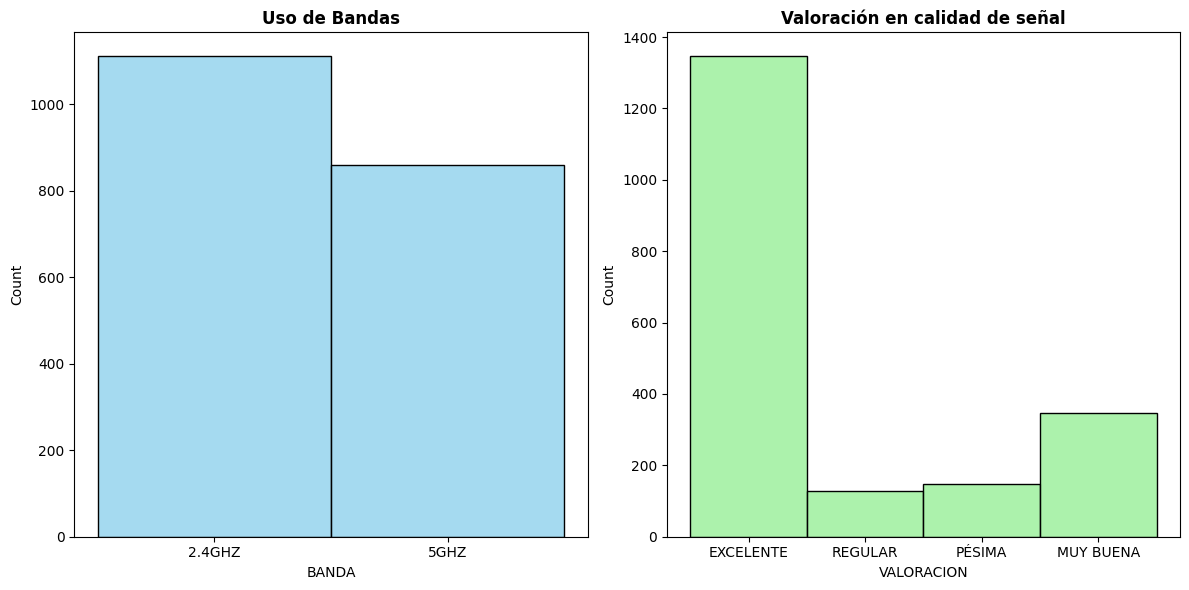

        feature  importance
1          RSSI    0.763347
0           SNR    0.236393
3    BANDA_5GHZ    0.000260
2  BANDA_2.4GHZ    0.000000
######################################################################################################################################################
Precisión del modelo: 0.9974683544303797 -- 99.75%
######################################################################################################################################################


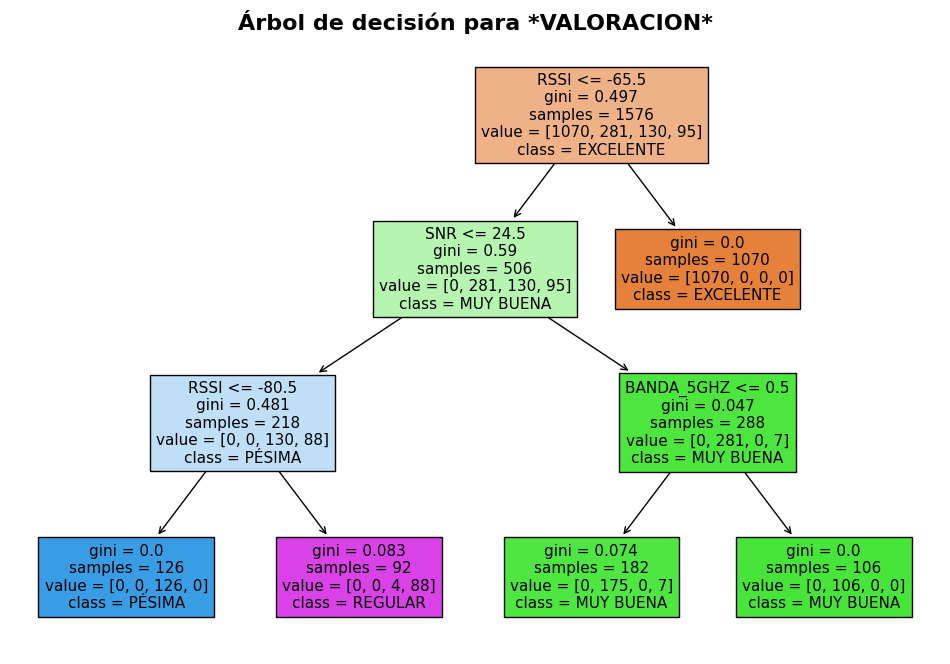

        feature  importance
1          RSSI    0.658259
0           SNR    0.341741
2  BANDA_2.4GHZ    0.000000
3    BANDA_5GHZ    0.000000
######################################################################################################################################################
Precisión del modelo: 0.9974683544303797 -- 99.75%
######################################################################################################################################################


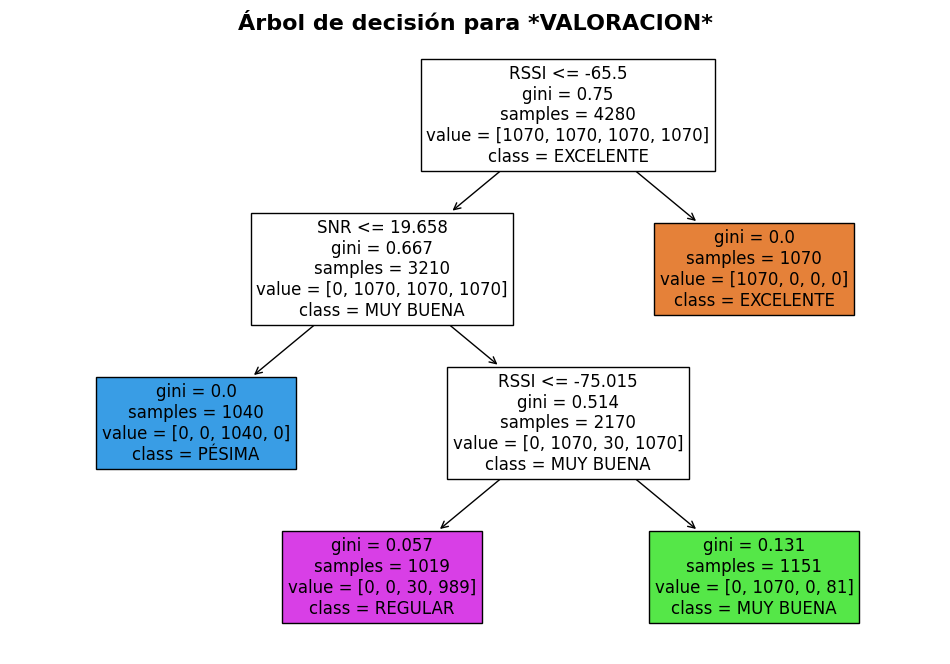

In [21]:
datos = cargar_datos()
datos = procesar_datos(datos)
visualizacion(datos)
modelo_arbol_decision(datos)
modelo_arbol_decision_datos_balanceados(datos)